<a href="https://colab.research.google.com/github/ElsaMolina/Challenge_TelecomX_pt.2/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df= pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

## Conociendo el conjunto de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [ ]:
'''
Investigando el contenido de cada columna,
debido a que noto que en las columnas hay listas de diccionarios.
'''
print(df.customer[1])
print(df.phone[1])
print(df.internet[1])
print(df.account[1])

{'gender': 'Male', 'SeniorCitizen': 0, 'Partner': 'No', 'Dependents': 'No', 'tenure': 9}
{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}
{'InternetService': 'DSL', 'OnlineSecurity': 'No', 'OnlineBackup': 'No', 'DeviceProtection': 'No', 'TechSupport': 'No', 'StreamingTV': 'No', 'StreamingMovies': 'Yes'}
{'Contract': 'Month-to-month', 'PaperlessBilling': 'No', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 59.9, 'Total': '542.4'}}


## Comporbando incoherencias

### Normalizando los datos
En la fase de conociendo el conjunto de datos noto la existencia de listas de diccionarios en las columnas de 'customer' en adelante. Decido normalizar los datos:

In [ ]:
#Normalizando columna por columna
  #customer
customer_normalizado= pd.json_normalize(df['customer'])
   #phone
phone_normalizado= pd.json_normalize(df['phone'])
   #internet
internet_normalizado= pd.json_normalize(df['internet'])
   #account
account_normalizado= pd.json_normalize(df['account'])

print(customer_normalizado)
print(phone_normalizado)
print(internet_normalizado)
print(account_normalizado)

      gender  SeniorCitizen Partner Dependents  tenure
0     Female              0     Yes        Yes       9
1       Male              0      No         No       9
2       Male              0      No         No       4
3       Male              1     Yes         No      13
4     Female              1     Yes         No       3
...      ...            ...     ...        ...     ...
7262  Female              0      No         No      13
7263    Male              0     Yes         No      22
7264    Male              0      No         No       2
7265    Male              0     Yes        Yes      67
7266    Male              0     Yes        Yes      63

[7267 rows x 5 columns]
     PhoneService     MultipleLines
0             Yes                No
1             Yes               Yes
2             Yes                No
3             Yes                No
4             Yes                No
...           ...               ...
7262          Yes                No
7263          Yes          

In [ ]:
#Uniendo columnas normalizadas

df_normalizado = df.copy()

df_normalizado = df.join(customer_normalizado).join(phone_normalizado).join(internet_normalizado).join(account_normalizado)

#Quitando las columnas originales

df_normalizado = df_normalizado.drop(['customer','phone','internet','account'], axis=1)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Comporbando duplicados

In [ ]:
#Checando registros duplicados
registros_duplicados = df_normalizado[ df_normalizado.duplicated(keep = False)]
print(registros_duplicados.sum())


customerID            0
Churn                 0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly     0.0
Charges.Total         0
dtype: object


### Registros en blanco

Detecté la existencia de registros en blanco al momento de intentar cambiar los tipos de dato de la columna 'Charges.Total', así que realicé una detección de registros en blanco en otras columnas:

#### Detección de registros en blanco

In [ ]:
def detectar_valores_en_blanco(df, mostrar_registros=True):
    # Crear DataFrame para almacenar resultados
    espacios_blanco = pd.DataFrame(index=df.index)

    conteo_blancos = {}

    for columna in df.columns:
        # Verificar valores en blanco
        espacios_blanco[columna] = df[columna].astype(str).str.strip().eq('')
        conteo = espacios_blanco[columna].sum()
        conteo_blancos[columna] = conteo

    return pd.DataFrame.from_dict(conteo_blancos, orient='index', columns=['Valores_en_blanco'])

resumen_blancos = detectar_valores_en_blanco(df_normalizado)

print("\nResumen final:")
print(resumen_blancos)



Resumen final:
                  Valores_en_blanco
customerID                        0
Churn                           224
gender                            0
SeniorCitizen                     0
Partner                           0
Dependents                        0
tenure                            0
PhoneService                      0
MultipleLines                     0
InternetService                   0
OnlineSecurity                    0
OnlineBackup                      0
DeviceProtection                  0
TechSupport                       0
StreamingTV                       0
StreamingMovies                   0
Contract                          0
PaperlessBilling                  0
PaymentMethod                     0
Charges.Monthly                   0
Charges.Total                    11


#### Identificando el índice de los registros

Para charges total:

In [ ]:

def detectar_valoresblanco_index_Charges(df_normalizado, mostrar_registros=True, mostrar_indices=True):
# Crear DataFrame para almacenar resultados
    espacios_blanco = pd.DataFrame(index=df_normalizado.index)

    # Diccionario para almacenar resultados
    resultados = {
    'conteo_blancos' : {},
    'indices_blancos': {}
    }

    for columna in df_normalizado.columns:
        # Verificar valores en blanco
        blanco = df_normalizado[columna].astype(str).str.strip().eq('')
        espacios_blanco[columna] = blanco
        conteo = blanco.sum()

    #Almacenar resultados
    resultados['conteo_blancos'][columna] = conteo
    resultados['indices_blancos'][columna] = df_normalizado[espacios_blanco[columna]].index.tolist()

    # Mostrar información por columna
    print(f"\nColumna '{columna}':")
    print(f"  - Valores en blanco: {conteo}")

    # para los índices
    if conteo > 0 and mostrar_indices:
            print(f"  - Índices con blancos: {resultados['indices_blancos'][columna]}")


  # DataFrame con índices problemáticos consolidados
    indices_todos = set()
    for indices in resultados['indices_blancos'].values():
        indices_todos.update(indices)

    return resultados

resultados = detectar_valoresblanco_index_Charges(df_normalizado)



Columna 'Charges.Total':
  - Valores en blanco: 11
  - Índices con blancos: [975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]


In [ ]:
#Checando registros visualmente para comporbar la existencia de los datos en blanco
df_normalizado.iloc[975]

,975
customerID,1371-DWPAZ
Churn,No
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL


Para columna churn:

In [ ]:
def detectar_valores_en_blanco_churn(df_normalizado, mostrar_registros=True, mostrar_indices=True):
   # Inicializar diccionario de resultados
    resultados = {
        'conteo_blancos': 0,
        'indices_blancos': [],
        'registros_problematicos': pd.DataFrame()
    }

# Detectar valores en blanco
    mascara_blancos = df_normalizado['Churn'].astype(str).str.strip().eq('')
    resultados['conteo_blancos'] = mascara_blancos.sum()
    resultados['indices_blancos'] = df_normalizado[mascara_blancos].index.tolist()

    # Mostrar resultados
    print(f"\nColumna 'Churn':")
    print(f"  - Total de valores en blanco: {resultados['conteo_blancos']}")

    if resultados['conteo_blancos'] > 0:
        if mostrar_indices:
            print(f"  - Índices con valores en blanco: {resultados['indices_blancos']}")

        if mostrar_registros:
            resultados['registros_problematicos'] = df_normalizado[mascara_blancos]

    else:
        print("  - No se encontraron valores en blanco en la columna 'Churn'")

    return resultados

resultados_churn = detectar_valores_en_blanco_churn(df_normalizado)


Columna 'Churn':
  - Total de valores en blanco: 224
  - Índices con valores en blanco: [30, 75, 96, 98, 175, 219, 312, 351, 368, 374, 380, 382, 395, 439, 451, 495, 540, 590, 640, 669, 681, 739, 791, 842, 876, 877, 903, 912, 932, 973, 992, 1013, 1017, 1160, 1172, 1218, 1236, 1303, 1364, 1366, 1517, 1657, 1705, 1764, 1795, 1805, 1825, 1860, 1883, 2021, 2101, 2138, 2151, 2154, 2158, 2200, 2245, 2264, 2390, 2394, 2429, 2467, 2494, 2576, 2584, 2613, 2627, 2644, 2690, 2726, 2733, 2751, 2879, 2913, 2919, 2945, 2953, 2973, 2989, 3053, 3060, 3076, 3177, 3199, 3202, 3207, 3220, 3249, 3266, 3290, 3300, 3305, 3320, 3365, 3378, 3438, 3468, 3538, 3590, 3617, 3619, 3688, 3724, 3804, 3827, 3833, 3844, 3858, 3900, 3924, 3968, 4021, 4072, 4081, 4128, 4196, 4199, 4282, 4327, 4390, 4393, 4396, 4411, 4413, 4431, 4497, 4541, 4578, 4579, 4599, 4609, 4662, 4665, 4713, 4750, 4753, 4762, 4769, 4778, 4785, 4860, 4918, 4938, 4946, 4976, 4985, 4992, 5001, 5042, 5149, 5179, 5214, 5215, 5228, 5255, 5332, 5341, 534

In [ ]:
#Checando registros visualmente para comporbar la existencia de los datos en blanco
df_normalizado.iloc[5149]

,5149
customerID,7026-TPCZX
Churn,
gender,Male
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,69
PhoneService,Yes
MultipleLines,No
InternetService,Fiber optic


#### Cambiando los registros en blanco

En Charges.Total:

In [ ]:
def reemplazar_blancos_por_cero(df_normalizado, indices):
  df_normalizado.loc[indices, 'Charges.Total'] = 0

  print(f"Se actualizaron {len(indices)} registros en 'Charges.Total'")
  print("Valores actualizados:")
  print(df_normalizado.loc[indices, 'Charges.Total'])

  return df_normalizado

indices_a_cambiar = [975, 1775, 1955, 2075, 2232, 2308, 2930, 3134, 3203, 4169, 5599]

df_normalizado = reemplazar_blancos_por_cero(df_normalizado, indices_a_cambiar)

Se actualizaron 11 registros en 'Charges.Total'
Valores actualizados:
975     0
1775    0
1955    0
2075    0
2232    0
2308    0
2930    0
3134    0
3203    0
4169    0
5599    0
Name: Charges.Total, dtype: object


In [ ]:
#Checando registros visualmente para comporbar que sí se hizo el cambio
df_normalizado.iloc[975]

,975
customerID,1371-DWPAZ
Churn,No
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL


En Churn:

In [ ]:
def reemplazar_blancos_por_yes(df_normalizado, indices):
  df_normalizado.loc[indices, 'Churn'] = 'Yes'

  print(f"Se actualizaron {len(indices)} registros en 'Churn'")
  print("Valores actualizados:")
  print(df_normalizado.loc[indices, 'Churn'])

  return df_normalizado

indices_a_cambiar = [30, 75, 96, 98, 175, 219, 312, 351, 368, 374, 380, 382, 395, 439, 451, 495, 540, 590, 640, 669, 681, 739, 791, 842, 876, 877, 903, 912, 932, 973, 992, 1013, 1017, 1160, 1172, 1218, 1236, 1303, 1364, 1366, 1517, 1657, 1705, 1764, 1795, 1805, 1825, 1860, 1883, 2021, 2101, 2138, 2151, 2154, 2158, 2200, 2245, 2264, 2390, 2394, 2429, 2467, 2494, 2576, 2584, 2613, 2627, 2644, 2690, 2726, 2733, 2751, 2879, 2913, 2919, 2945, 2953, 2973, 2989, 3053, 3060, 3076, 3177, 3199, 3202, 3207, 3220, 3249, 3266, 3290, 3300, 3305, 3320, 3365, 3378, 3438, 3468, 3538, 3590, 3617, 3619, 3688, 3724, 3804, 3827, 3833, 3844, 3858, 3900, 3924, 3968, 4021, 4072, 4081, 4128, 4196, 4199, 4282, 4327, 4390, 4393, 4396, 4411, 4413, 4431, 4497, 4541, 4578, 4579, 4599, 4609, 4662, 4665, 4713, 4750, 4753, 4762, 4769, 4778, 4785, 4860, 4918, 4938, 4946, 4976, 4985, 4992, 5001, 5042, 5149, 5179, 5214, 5215, 5228, 5255, 5332, 5341, 5349, 5375, 5394, 5432, 5444, 5464, 5535, 5561, 5591, 5608, 5644, 5684, 5714, 5739, 5823, 5835, 5871, 6013, 6045, 6046, 6069, 6109, 6126, 6207, 6291, 6346, 6373, 6385, 6406, 6493, 6500, 6501, 6504, 6515, 6531, 6603, 6664, 6678, 6693, 6703, 6710, 6713, 6786, 6790, 6796, 6814, 6854, 6866, 6888, 6913, 6916, 6980, 7002, 7009, 7016, 7031, 7049, 7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247]

df_normalizado = reemplazar_blancos_por_yes(df_normalizado, indices_a_cambiar)

Se actualizaron 224 registros en 'Churn'
Valores actualizados:
30      Yes
75      Yes
96      Yes
98      Yes
175     Yes
       ... 
7158    Yes
7180    Yes
7211    Yes
7239    Yes
7247    Yes
Name: Churn, Length: 224, dtype: object


In [ ]:
#Checando registros visualmente para comporbar que sí se hizo el cambio
df_normalizado.iloc[5149]

,5149
customerID,7026-TPCZX
Churn,Yes
gender,Male
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,69
PhoneService,Yes
MultipleLines,No
InternetService,Fiber optic


### Cambiando los tipos de datos

**Diccionario de datos**


*   customerID: número de identificación único de cada cliente

*  Churn: si el cliente dejó o no la empresa
  churn = yes : Dejó de utilizar los servicios (abandono)
  churn = no : Sigue usando los servicios(activo)

* gender: género (masculino y femenino)

* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años


* Partner: si el cliente tiene o no una pareja

* Dependents: si el cliente tiene o no dependientes

* tenure: meses de contrato del cliente

* PhoneService: suscripción al servicio telefónico

* MultipleLines: suscripción a más de una línea telefónica

* InternetService: suscripción a un proveedor de internet

* OnlineSecurity: suscripción adicional de seguridad en línea

* OnlineBackup: suscripción adicional de respaldo en línea

* DeviceProtection: suscripción adicional de protección del dispositivo

* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

* StreamingTV: suscripción de televisión por cable

* StreamingMovies: suscripción de streaming de películas

* Contract: tipo de contrato

* PaperlessBilling: si el cliente prefiere recibir la factura en línea

* PaymentMethod: forma de pago

* Charges.Monthly: total de todos los servicios del cliente por mes

* Charges.Total: total gastado por el cliente



In [ ]:
# Tranformando datos de la columna Charges.Total a número decimal
df_normalizado['Charges.Total'] = df_normalizado['Charges.Total'].astype(np.float64)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Creación de columna 'Charges.Daily'

In [ ]:
def crear_columna_Charges_Daily(df_normalizado):
  # Obtener lista de columnas actuales
    columnas = list(df_normalizado.columns)

 # Calcular la nueva columna
    df_normalizado['Charges.Daily'] = df_normalizado['Charges.Monthly'] / 30

   # Eliminar la nueva columna de la lista (si ya estaba al final)
    columnas = [col for col in columnas if col != 'Charges.Daily']

    #Insertar la nueva columna en posición 19
    posicion = 19 if len(columnas) > 19 else len(columnas)
    columnas.insert(posicion, 'Charges.Daily')

   # Reordenar el DataFrame
    df_normalizado = df_normalizado[columnas]

    print(f"\nNueva columna creada en posición {posicion+1}:")
    print(f"Columnas reordenadas ({len(columnas)} total):")
    print(columnas)

    return df_normalizado

df_normalizado = crear_columna_Charges_Daily(df_normalizado)
df_normalizado.head()


Nueva columna creada en posición 20:
Columnas reordenadas (22 total):
['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Daily', 'Charges.Monthly', 'Charges.Total']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Daily,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.186667,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,1.996667,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.463333,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.266667,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.796667,83.9,267.40


#📊 Carga y análisis

## Análisis Descriptivo

In [ ]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Daily,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,2.157337,64.720098,2277.182035
std,0.369074,24.571773,1.004319,30.129572,2268.648587
min,0.000000,0.000000,0.608333,18.250000,0.000000
25%,0.000000,9.000000,1.180833,35.425000,396.200000
50%,0.000000,29.000000,2.343333,70.300000,1389.200000
75%,0.000000,55.000000,2.995833,89.875000,3778.525000
max,1.000000,72.000000,3.958333,118.750000,8684.800000


## Distribución de evasión ('Churn')

In [ ]:
#Función para gráfico de distribución de evasión
def grafico_churn(df_normalizado):
  #cuenta de los churns
  churn_counts = df_normalizado['Churn'].value_counts()

  colors = [ '#8DBCC7', '#7F8CAA']

  #Creación de la gráfica
  fig, ax = plt.subplots(figsize =(5,5))

  wedges, texts, autotexts = ax.pie(
          churn_counts,
          labels=churn_counts.index,
          autopct='%1.1f%%',
          startangle=90,
          colors=colors,
          wedgeprops={'width': 0.4,'edgecolor': 'white', 'linewidth': 4 },
          textprops = {'fontsize':14},
          pctdistance=0.8
          )

  for autotext in autotexts:
      autotext.set_color('white')
      autotext.set_fontsize(13)

  ax.set_title('Distribución de Evasión de Clientes', fontsize=17, pad=0, fontweight='bold', fontfamily='serif')

  #Creando los porcentajes
  no_porcentaje= churn_counts['No']/churn_counts.sum()*100
  si_porcentaje= churn_counts['Yes']/churn_counts.sum()*100

  ax.text(0, -1.2 ,
          f"• {no_porcentaje:.1f}% clientes activos\n"
          f"• {si_porcentaje:.1f}% clientes inactivos",
            ha='center',va='center', color='black', fontsize=13,
            bbox={'boxstyle': 'round',  'facecolor': '#7F8CAA', 'alpha': 0.5, 'edgecolor': '#7F8CAA', 'pad':0.5})

  plt.axis('equal')
  plt.tight_layout()
  return fig

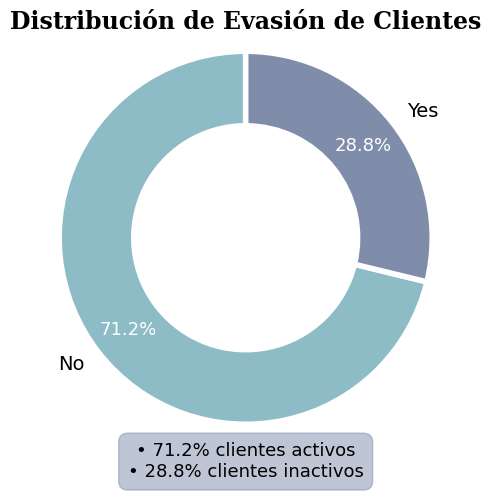

In [ ]:
distribucion_churn = grafico_churn(df_normalizado)
plt.show()

## Cálculo de Churn rate

In [ ]:
total_clientes = len(df_normalizado)
clientes_churn = df_normalizado[df_normalizado['Churn'] == 'Yes'].shape[0]
churn_rate = (clientes_churn / total_clientes) * 100

print(f"Churn Rate General: {churn_rate:.2f}%")

Churn Rate General: 28.80%


## Recuento de evasión por variables categóricas

In [ ]:
#Función para graficar proporción de Churn por categorías con etiquetas de porcentaje

def grafico_churn_categorico(df_normalizado, columna, comentario=None):
  #Calculando la proporción
    prop_churn = df_normalizado.groupby(columna, observed=True)['Churn'].value_counts(normalize=True).unstack()

   #creando la figura
    fig, ax = plt.subplots(figsize=(12.5, 5))

    bars = prop_churn.plot(kind='bar', stacked=True, color=[ '#97BBC5','#818CA7'], ax=ax)

    ax.set_title(f'Proporción de Churn por {columna}', fontsize=18, fontweight='bold', fontfamily='serif', pad =25)
    ax.set_ylabel('')
    ax.set_yticks([])
    ax.set_xlabel(columna, fontsize=14, fontweight='bold',labelpad= 15)
    ax.tick_params(axis='x', rotation=0, width= 2, length=6, labelsize=12, pad=10)
    ax.legend(title='Churn', labels=['No','Yes' ], fontsize=12, title_fontsize=13)

    #Etiquetas de los porcentajes

    for rects in ax.containers:

        heights = np.array([rect.get_height() for rect in rects])
        bottoms = np.array([rect.get_y() for rect in rects])

        y_positions = bottoms + heights/2

        for rect, y_pos, height in zip(rects, y_positions, heights):
            if height > 0:
                ax.text(rect.get_x() + rect.get_width()/2.,
                        y_pos,
                        f'{height:.1%}',
                        ha='center',
                        va='center',
                        color='white',
                        fontsize=13)

      #Para los comentarios
        if comentario:
          ax.text(1.2, 0.7,
                  comentario,
                  ha='center',
                  va='center',
                  color ='black',
                  transform=ax.transAxes,
                  fontsize=12,
                  bbox=dict(facecolor='#BFC5D3', alpha=0.8, edgecolor='#BFC5D3', boxstyle='round', pad=0.4))

        for spine in ['top', 'left', 'right']:
          ax.spines[spine].set_visible(False)

    plt.tight_layout()

    return fig

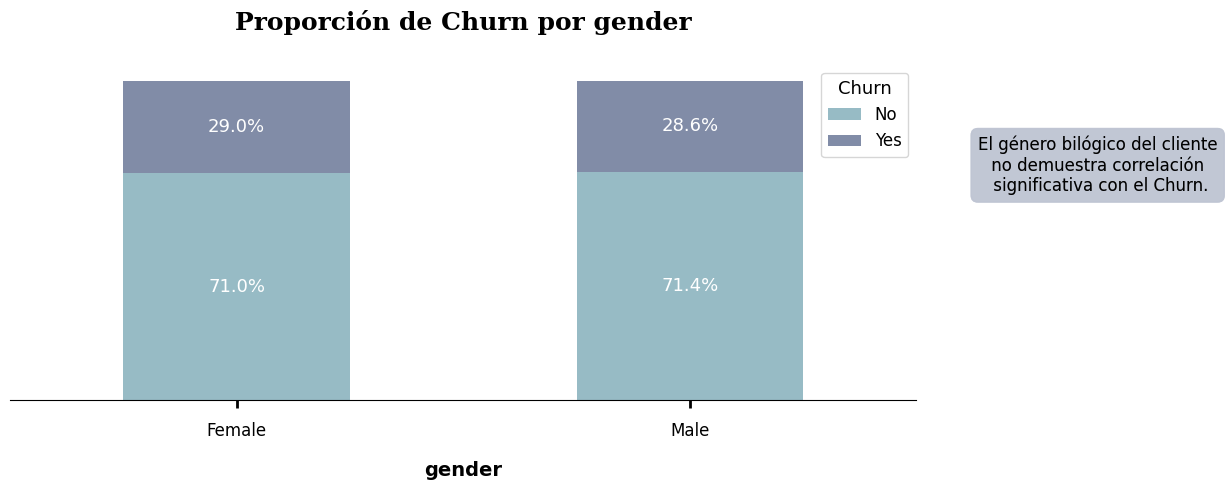

In [ ]:
churn_gender = grafico_churn_categorico(df_normalizado,
                                        'gender',
                                        comentario ="El género bilógico del cliente\n no demuestra correlación \n significativa con el Churn.")
plt.show()

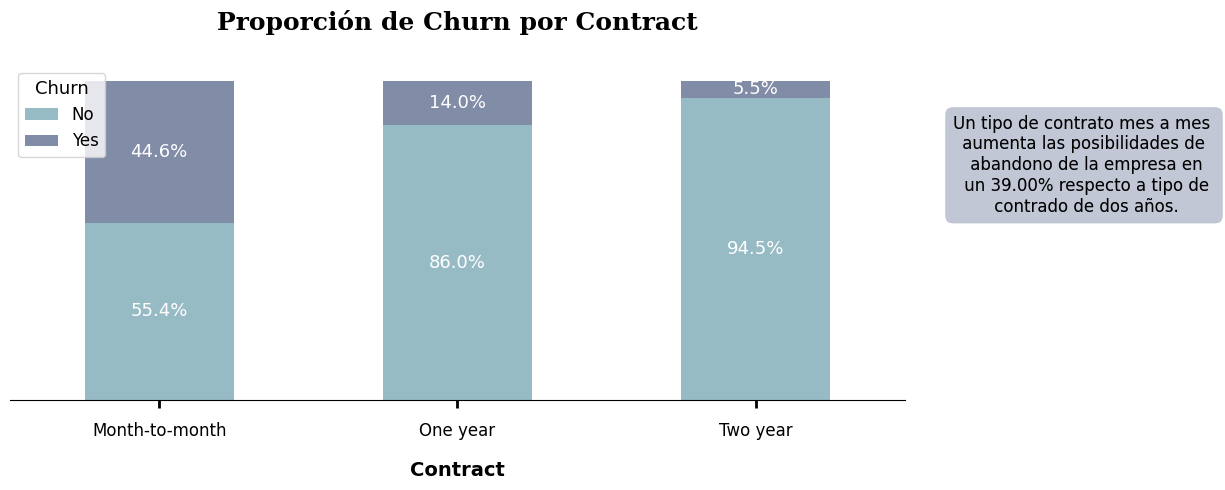

In [ ]:
dif_m2m_2y = round(44.6 - 5.5)

churn_ContractType = grafico_churn_categorico(df_normalizado,
                                              'Contract',
                                              comentario= f"Un tipo de contrato mes a mes \n aumenta las posibilidades de \n abandono de la empresa en\n un {dif_m2m_2y:.2f}% respecto a tipo de\n contrado de dos años.")
plt.show()

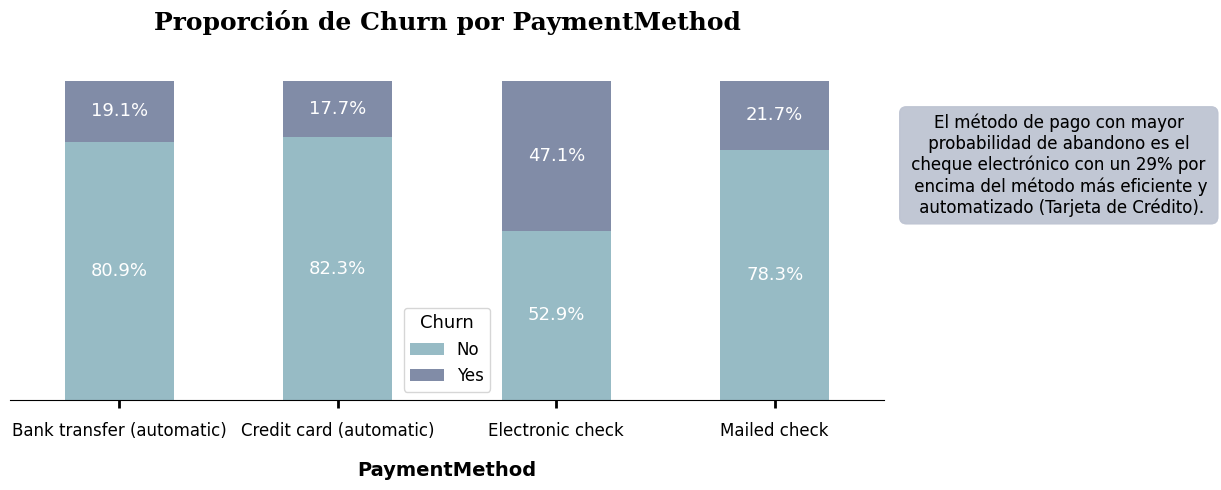

In [ ]:
dif_ECheck_CreditCard = round(47.1 - 17.7 )
churn_PaymentMethod = grafico_churn_categorico(df_normalizado,
                                               'PaymentMethod',
                                               comentario= f"El método de pago con mayor\n probabilidad de abandono es el \n cheque electrónico con un {dif_ECheck_CreditCard}% por \n encima del método más eficiente y\n automatizado (Tarjeta de Crédito).")
plt.show()

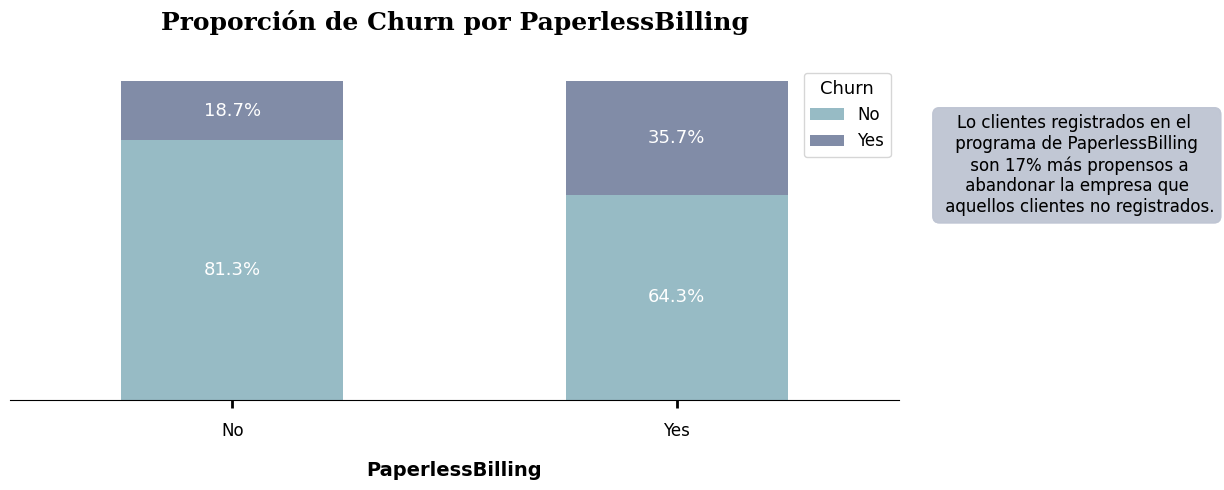

In [ ]:
dif_NoPaper_Paper = round(35.7 - 18.7 )
churn_PaperlessBilling = grafico_churn_categorico(df_normalizado,
                                                  'PaperlessBilling',
                                                  comentario= f"Lo clientes registrados en el \n programa de PaperlessBilling \n son {dif_NoPaper_Paper}% más propensos a\n abandonar la empresa que \n aquellos clientes no registrados.")
plt.show()

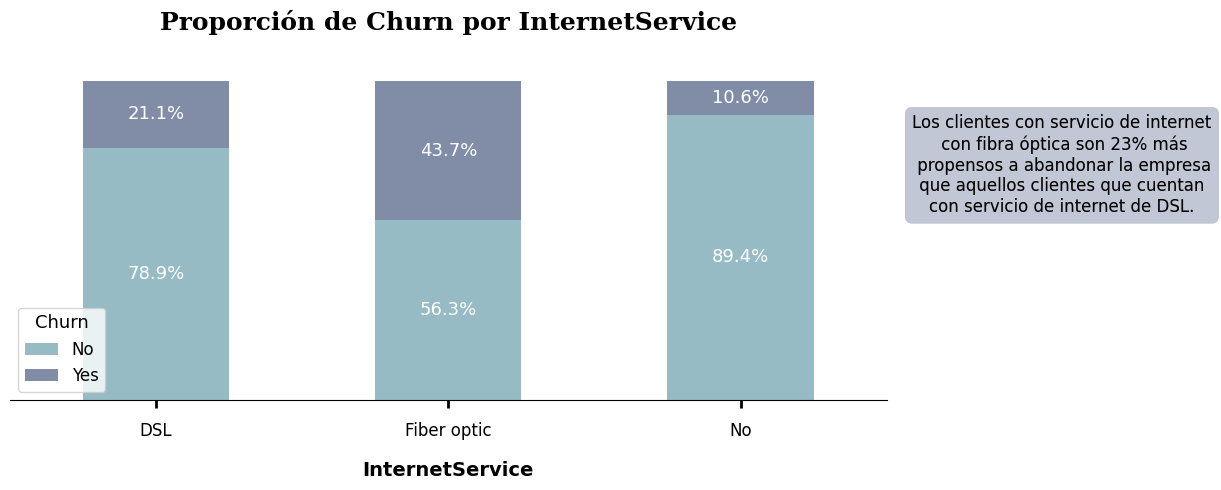

In [ ]:
dif_FiberOptic_DSL = round(43.7 - 21.1 )
churn_InternetService = grafico_churn_categorico(df_normalizado,
                                                  'InternetService',
                                                  comentario= f"Los clientes con servicio de internet\n con fibra óptica son {dif_FiberOptic_DSL}% más\n propensos a abandonar la empresa\n que aquellos clientes que cuentan \ncon servicio de internet de DSL.")
plt.show()

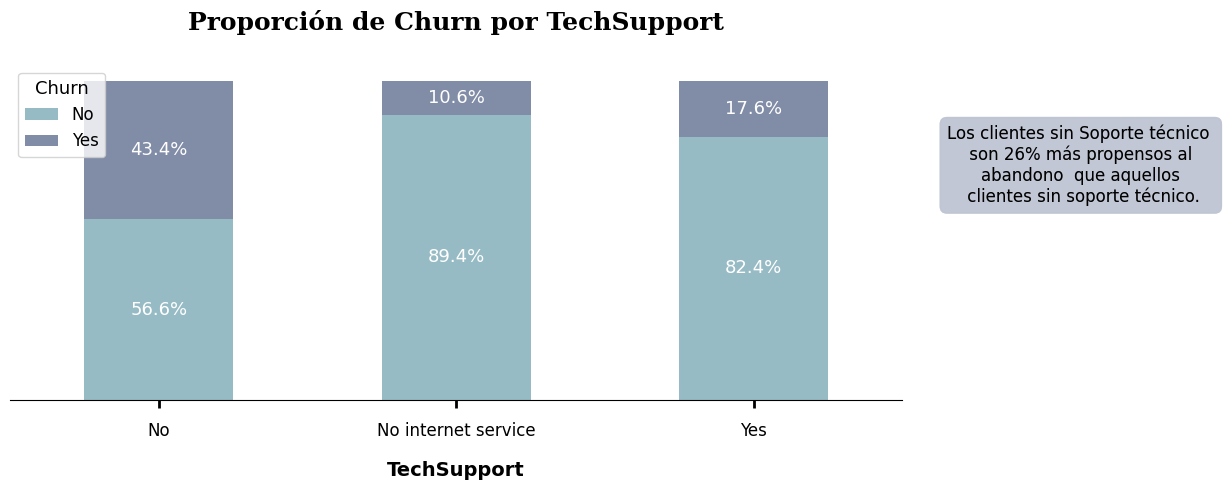

In [ ]:
dif_no_yes = round(43.4 - 17.6)
churn_TechSupport = grafico_churn_categorico(df_normalizado,
                                                  'TechSupport',
                                                  comentario= f"Los clientes sin Soporte técnico \n son {dif_no_yes}% más propensos al \nabandono  que aquellos\n clientes sin soporte técnico.")
plt.show()

## Conteo de evasión por variables numéricas

Creo un DataFrame con solo las variables numéricas, para no modificar el DataFrame normalizado que he estado utilizando.

In [ ]:
df_numerico =df_normalizado.loc[:,['Churn','tenure','Charges.Daily','Charges.Monthly','Charges.Total']]
df_numerico.head()

,Churn,tenure,Charges.Daily,Charges.Monthly,Charges.Total
0,No,9,2.186667,65.6,593.30
1,No,9,1.996667,59.9,542.40
2,Yes,4,2.463333,73.9,280.85
3,Yes,13,3.266667,98.0,1237.85
4,Yes,3,2.796667,83.9,267.40


### Creando los rangos

In [ ]:
df_numerico.describe()

,tenure,Charges.Daily,Charges.Monthly,Charges.Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,2.157337,64.720098,2277.182035
std,24.571773,1.004319,30.129572,2268.648587
min,0.000000,0.608333,18.250000,0.000000
25%,9.000000,1.180833,35.425000,396.200000
50%,29.000000,2.343333,70.300000,1389.200000
75%,55.000000,2.995833,89.875000,3778.525000
max,72.000000,3.958333,118.750000,8684.800000


In [ ]:
#Función para crear rangos basados en el análisis descriptivo para Charges
def crear_rangos(df_numerico, columna):

  stats= round(df_numerico[columna].describe())

  bins = [
      0,
      stats['min'],
      stats['25%'],
      stats['mean']- stats['std']/2,
      stats['50%'],
      stats['mean'] + stats['std']/2,
      stats['75%'],
      stats['max'],
    float('inf')
      ]

  bins =sorted(list(set(bins)))

  labels = [
        f"0 - {bins[1]}",
        f"{bins[1]}-{bins[2]}",
        f"{bins[2]}-{bins[3]}",
        f"{bins[3]}-{bins[4]}",
        f"{bins[4]}-{bins[5]}",
        f"{bins[5]}-{bins[6]}",
        f"{bins[6]}-{bins[7]}",
        f">{bins[7]}"
    ]

  df_numerico[f'{columna}_range'] = pd.cut(df_numerico[columna], bins=bins,
                                           labels=labels[:len(bins)-1], right=False)

  return df_numerico

In [ ]:
#Creando las columnas de rangos en df_numerico
crear_rangos(df_numerico, 'Charges.Daily')
crear_rangos(df_numerico, 'Charges.Monthly')
crear_rangos(df_numerico, 'Charges.Total')

,Churn,tenure,Charges.Daily,Charges.Monthly,Charges.Total,Charges.Daily_range,Charges.Monthly_range,Charges.Total_range
0,No,9,2.186667,65.60,593.30,2.0-2.5,50.0-70.0,396.0-1142.5
1,No,9,1.996667,59.90,542.40,1.5-2.0,50.0-70.0,396.0-1142.5
2,Yes,4,2.463333,73.90,280.85,2.0-2.5,70.0-80.0,0 - 396.0
3,Yes,13,3.266667,98.00,1237.85,3.0-4.0,90.0-119.0,1142.5-1389.0
4,Yes,3,2.796667,83.90,267.40,2.5-3.0,80.0-90.0,0 - 396.0
...,...,...,...,...,...,...,...,...
7262,No,13,1.838333,55.15,742.90,1.5-2.0,50.0-70.0,396.0-1142.5
7263,Yes,22,2.836667,85.10,1873.70,2.5-3.0,80.0-90.0,1389.0-3411.5
7264,No,2,1.676667,50.30,92.75,1.5-2.0,50.0-70.0,0 - 396.0
7265,No,67,2.261667,67.85,4627.65,2.0-2.5,50.0-70.0,3779.0-8685.0


In [ ]:
# Función para crear rangos de tenure, por años
def create_tenure_ranges(df_numerico):
    conditions = [
        (df_numerico['tenure'] <= 12),
        (df_numerico['tenure'] <= 24) & (df_numerico['tenure'] > 12),
        (df_numerico['tenure'] <= 36) & (df_numerico['tenure'] > 24),
        (df_numerico['tenure'] <= 48) & (df_numerico['tenure'] > 36),
        (df_numerico['tenure'] <= 60) & (df_numerico['tenure'] > 48),
        (df_numerico['tenure'] > 60)
    ]

    choices = ['0-12', '12-24', '24-36', '36-48', '48-60', '60+']

    df_numerico['tenure_range'] = pd.Series(
        pd.cut(df_numerico['tenure'],
               bins=[0, 12, 24, 36, 48, 60, float('inf')],
               labels=choices,
               right=True,
               include_lowest=True),
        dtype="category"
    )
    return df_numerico

df_numerico = create_tenure_ranges(df_numerico)
df_numerico

,Churn,tenure,Charges.Daily,Charges.Monthly,Charges.Total,Charges.Daily_range,Charges.Monthly_range,Charges.Total_range,tenure_range
0,No,9,2.186667,65.60,593.30,2.0-2.5,50.0-70.0,396.0-1142.5,0-12
1,No,9,1.996667,59.90,542.40,1.5-2.0,50.0-70.0,396.0-1142.5,0-12
2,Yes,4,2.463333,73.90,280.85,2.0-2.5,70.0-80.0,0 - 396.0,0-12
3,Yes,13,3.266667,98.00,1237.85,3.0-4.0,90.0-119.0,1142.5-1389.0,12-24
4,Yes,3,2.796667,83.90,267.40,2.5-3.0,80.0-90.0,0 - 396.0,0-12
...,...,...,...,...,...,...,...,...,...
7262,No,13,1.838333,55.15,742.90,1.5-2.0,50.0-70.0,396.0-1142.5,12-24
7263,Yes,22,2.836667,85.10,1873.70,2.5-3.0,80.0-90.0,1389.0-3411.5,12-24
7264,No,2,1.676667,50.30,92.75,1.5-2.0,50.0-70.0,0 - 396.0,0-12
7265,No,67,2.261667,67.85,4627.65,2.0-2.5,50.0-70.0,3779.0-8685.0,60+


### Creación de gráficos

In [ ]:
#Función para graficar proporción de Churn por rango en categoría (numerico) con etiquetas de porcentaje y titulo personalizado
def grafico_churn_numerico(df_numerico, columna, titulo_personalizado=None, comentario=None):
  prop_churn = df_numerico.groupby(columna, observed=True)['Churn'].value_counts(normalize=True).unstack()

  fig, ax = plt.subplots(figsize=(12.5, 5))

  bars = prop_churn.plot(kind='bar', stacked=True, color=['#97BBC5','#818CA7'], ax=ax)

  titulo = titulo_personalizado if titulo_personalizado else f'Proporción de Churn por {columna}'
  ax.set_title(titulo, fontsize=18, fontweight='bold', fontfamily='serif', pad=25)

  ax.set_ylabel('')
  ax.set_yticks([])
  ax.set_xlabel(columna, fontsize=14, fontweight='bold', labelpad=15)
  ax.tick_params(axis='x', rotation=0, width=2, length=6, labelsize=12, pad=10)
  ax.legend(title='Churn', labels=['No', 'Yes'], fontsize=12, title_fontsize=13)

  for rects in ax.containers:
        heights = np.array([rect.get_height() for rect in rects])
        bottoms = np.array([rect.get_y() for rect in rects])
        y_positions = bottoms + heights/2

        for rect, y_pos, height in zip(rects, y_positions, heights):
            if height > 0:
                ax.text(rect.get_x() + rect.get_width()/2.,
                        y_pos,
                        f'{height:.1%}',
                        ha='center',
                        va='center',
                        color='white',
                        fontsize=13)
  if comentario:
        ax.text(1.2, 0.7,
                comentario,
                ha='center',
                va='center',
                color='black',
                transform=ax.transAxes,
                fontsize=12,
                bbox=dict(facecolor='#BFC5D3', alpha=0.8, edgecolor='#BFC5D3', boxstyle='round', pad=0.4))

  for spine in ['top', 'left', 'right']:
        ax.spines[spine].set_visible(False)

  plt.tight_layout()
  return fig

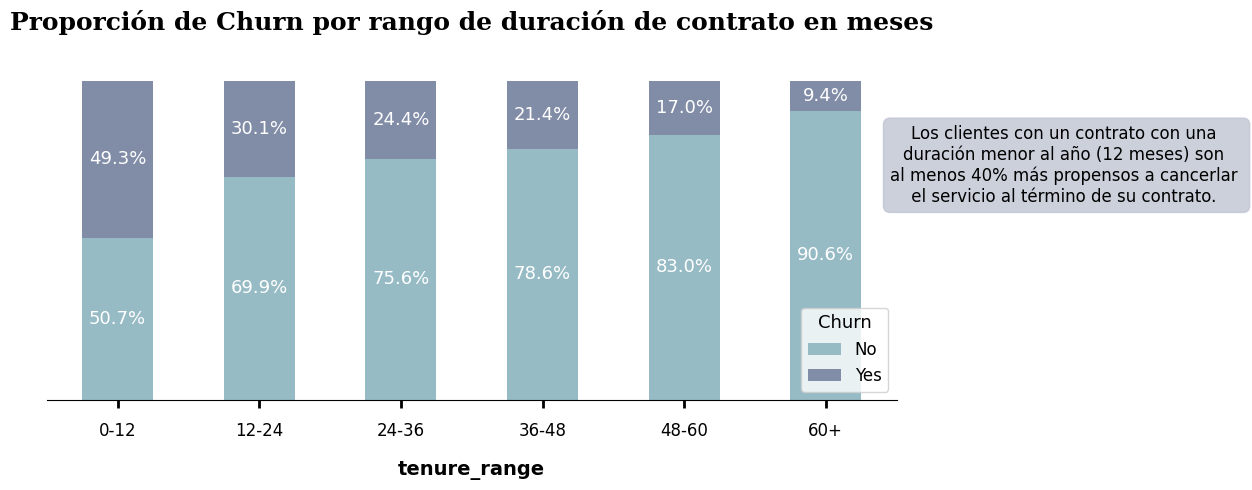

In [ ]:
dif_0a1_1a2= round(49.3 - 9.4)
churn_tenure = grafico_churn_numerico(df_numerico, 'tenure_range',
                                      titulo_personalizado="Proporción de Churn por rango de duración de contrato en meses",
                                      comentario=f"Los clientes con un contrato con una \nduración menor al año (12 meses) son \nal menos {dif_0a1_1a2}% más propensos a cancerlar \n el servicio al término de su contrato.  ")
plt.show()

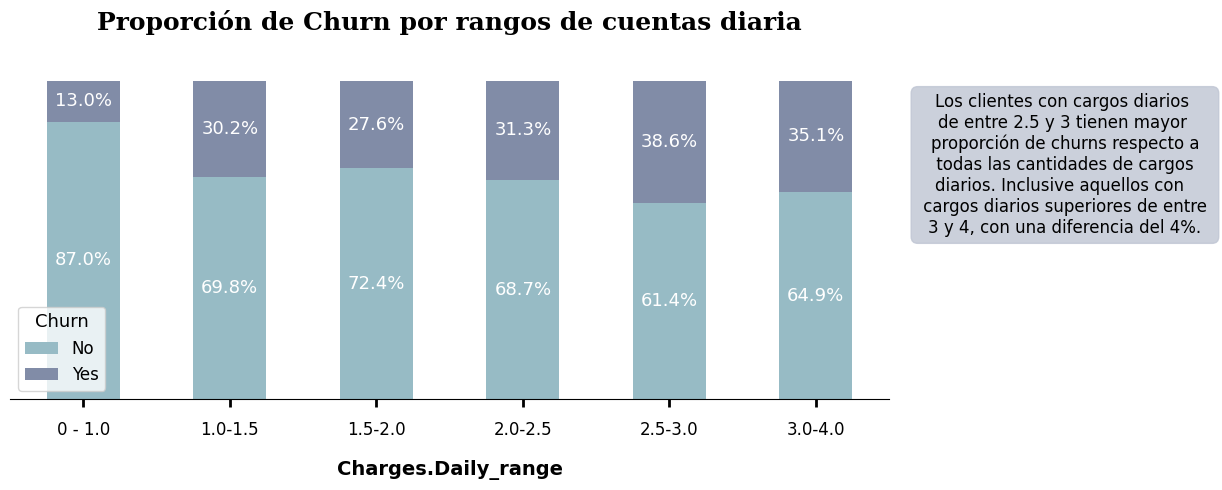

In [ ]:
dif_23_34= round(38.6- 35.1)
churn_ChargesDaily = grafico_churn_numerico(df_numerico, 'Charges.Daily_range',
                                            titulo_personalizado= "Proporción de Churn por rangos de cuentas diaria",
                                            comentario=f"Los clientes con cargos diarios \nde entre 2.5 y 3 tienen mayor \nproporción de churns respecto a\n todas las cantidades de cargos \ndiarios. Inclusive aquellos con  \n cargos diarios superiores de entre \n3 y 4, con una diferencia del {dif_23_34}%.")
plt.show()

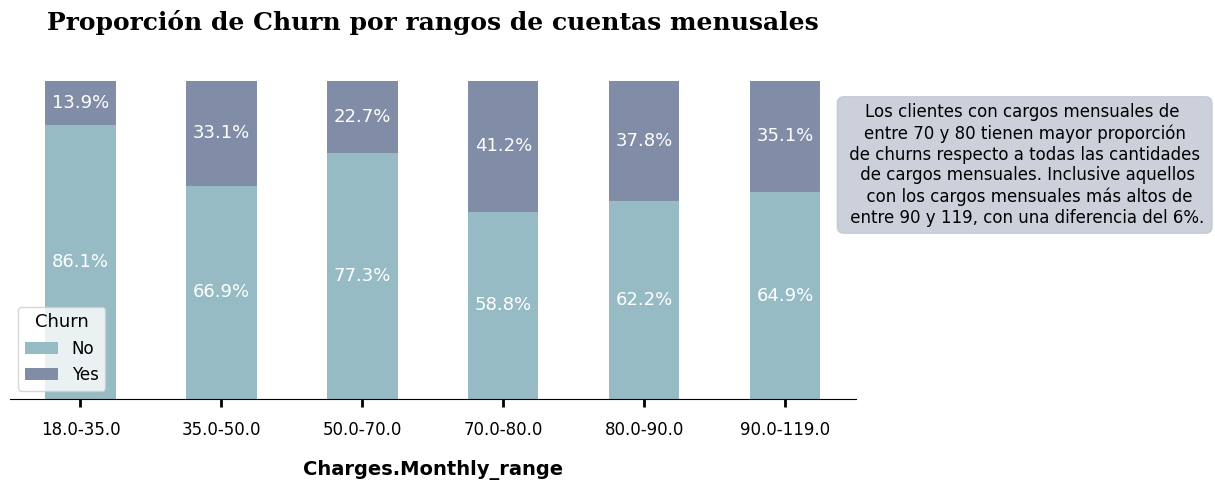

In [ ]:
dif_7080_90119= round(41.2- 35.1)
churn_ChargesMonthly = grafico_churn_numerico(df_numerico, 'Charges.Monthly_range',
                                            titulo_personalizado= "Proporción de Churn por rangos de cuentas menusales",
                                            comentario=f"Los clientes con cargos mensuales de \nentre 70 y 80 tienen mayor proporción\n de churns respecto a todas las cantidades \n de cargos mensuales. Inclusive aquellos\n  con los cargos mensuales más altos de\n entre 90 y 119, con una diferencia del {dif_7080_90119}%.")
plt.show()

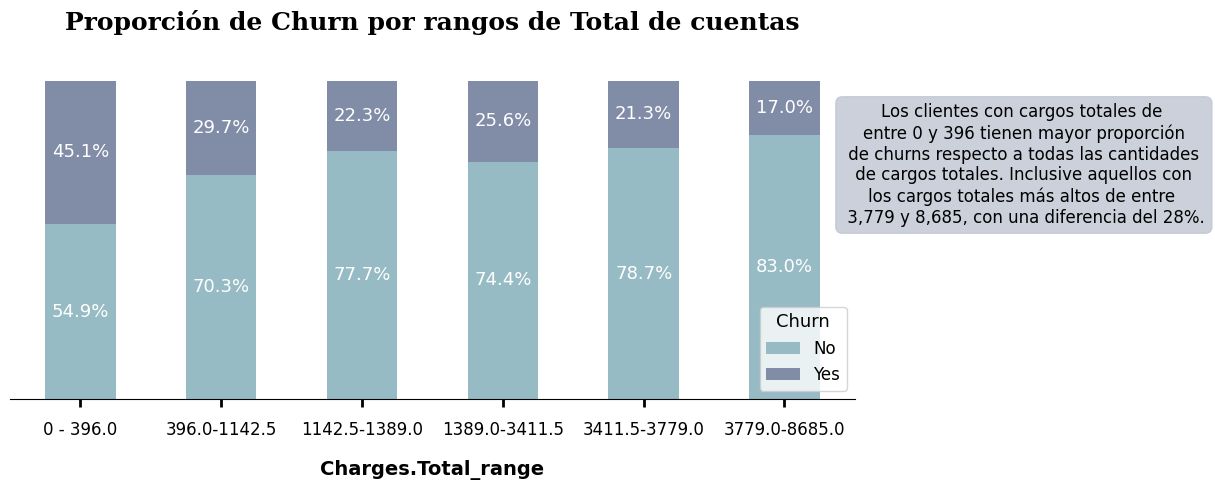

In [ ]:
dif_0396_37798685= round(45.1- 17)
churn_ChargesTotal = grafico_churn_numerico(df_numerico, 'Charges.Total_range',
                                            titulo_personalizado= "Proporción de Churn por rangos de Total de cuentas",
                                            comentario=f"Los clientes con cargos totales de \nentre 0 y 396 tienen mayor proporción\n de churns respecto a todas las cantidades \n de cargos totales. Inclusive aquellos con \nlos cargos totales más altos de entre \n 3,779 y 8,685, con una diferencia del {dif_0396_37798685}%.")
plt.show()



#📄Informe final

## **Introducción**


---

###**Contexto del Proyecto**

Este proyecto, **"Análisis de Churn en Telecom X"**, tiene como objetivo principal identificar la evasión de clientes en la empresa Telecom X, la cual enfrenta una tasa de abandono (Churn Rate) significativamente alta. A través de un **Análisis Exploratoio de Datos**, buscamos descubrir los patrones clave que influyen en la decisión de los clientes de dejar los servicios, con el fin de desarrollar estrategias efectivas para mejorar su retención.

### **Metodología y Enfoque**
Mediante el uso de Python y sus bibliotecas de análisis de datos (Pandas, NumPy, Matplotlib, Seaborn), exploraremos el conjunto de datos proporcionado por Telecom X para:

* Calcular el **Churn Rate general** y la **distribución del Churn** por variables demográficas, tipo de contrato y servicios adicionales.

* Identificar **factores de riesgo** (ej: clientes con contratos mensuales, falta de servicios de soporte técnico).

* Visualizar patrones clave a través de **gráficos** que faciliten la interpretación de resultados.


###**Impacto Esperado**
Los resultados de este proyecto no solo brindarán **insights accionables**, sino que también apoyarán la toma de decisiones estratégicas para:

* **Reducir el Churn Rate** mediante intervenciones dirigidas a los segmentos de mayor riesgo.

* **Optimizar la experiencia del cliente**, mejorando la oferta de servicios críticos como Online Security o Tech Support.

* **Aumentar la rentabilidad**, al minimizar la pérdida de ingresos recurrentes asociada a la fuga de clientes.

Con este análisis, Telecom X estará mejor equipada para fidelizar a su base de clientes y mantener una ventaja competitiva en el mercado.

## **Limpieza y Tratamiento de Datos**


---

### **1. Carga y Estructuración Inicial de los Datos**
Los datos proporcionados por Telecom X se encontraban originalmente en **formato JSON** y contenía información esencial sobre los clientes, incluyendo:
* Su **ID** único e irrepetible
* Estatus de **abandono **(Churn)
* **Información personal** del cliente
* **Servicios de teléfono** que ha contratado
* **Servicios de internet** que ha contratado
* Información sobre sus cargos y **facturación**.

Para poder trabajar con esta información, utilicé la biblioteca Pandas de Python, que me permitió cargar los datos y convertirlos en un DataFrame estructurado, facilitando así su manipulación y análisis posterior.

### **2. Normalización y Estandarización**
Una vez cargados los datos, realicé un proceso de normalización para asegurar que todas las columnas tuvieran un formato consistente y fueran aptas para el análisis exploratorio.

### **3. Manejo de Datos Faltantes y Duplicados**
* Eliminé registros repetidos (si había)
* Reemplacé datos faltantes:
  * En la variable numérica **Charges.Total**, reemplacé 11 registros con el valor 0 (cero).
  * En la variable **Churn**, encontré 224 registros con calores en blanco. Dado que estos casos podrían afectar significativamente el análisis de abandono, decidí reemplazarlos con el valor "Yes", asumiendo que representaban clientes que ya no estaban activos.

### **4. Transformación de Tipos de Datos y Creación de Variables**
Para optimizár el análisis, realicé las siguientes transformaciones:
* **Conversión de tipos de datos**: La columna Charges.Total estaba originalmente como texto (string). La convertí a tipo numérico decimal (float) para habilitar operaciones matemáticas y análisis estadísticos.
* **Nueva variable** derivada: Creé la columna Charges.Daily, que representa el cargo diario promedio del cliente. Esta métrica se calculó dividiendo charges.Monthly entre los 30 días del mes, lo que proporcionó una perspectiva adicional sobre los patrones de gasto.

### **5. Resultado Final**
Tras este proceso de limpieza y transformación, obtuve un DataFrame depurado al cual llamé ***df_normalizado***, que estaba listo para el análisis exploratorio y que cuenta con las siguientes características:

✔ Sin duplicados

✔ Datos faltantes remplazados de manera estratégica

✔ Variables numéricas estandarizadas

✔ Nueva métrica (Charges.Daily) para enriquecer el análisis


## **Análisis Exploratorio de Datos**


---

###**1. Definición y relevancia del Churn**

El **churn** o rotación de clientes es un indicador crítico en el sector de telecomunicaciones, ya que mide el porcentaje de clientes que cancelan sus servicios en un período determinado. Para TelecomX, este fenómeno se clasifica en:

  - **Churn = Yes**: Pérdida de clientes (impacto negativo).

  - **Churn = No:** Retención de clientes (impacto positivo).

El análisis del churn permite identificar patrones y factores que influyen en la decisión de los clientes, lo que es esencial para diseñar estrategias de retención efectivas.

###**2. Proporción del Churn en TelecomX**

El **churn rate** de TelecomX es del **28.8%**, situándose por debajo del promedio de la industria (31%). Aunque esta cifra es favorable en comparación con el sector, la alta competencia y la entrada de nuevos actores al mercado exigen acciones proactivas para reducir aún más la fuga de clientes.

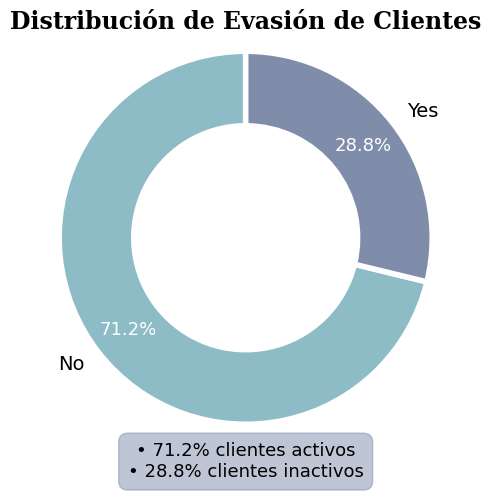

In [ ]:
distribucion_churn

### **3. Distribución del Churn por Categorías**

####**a) Género**

El análisis no revela una correlación significativa entre el género biológico del cliente y la probabilidad de abandono **(Churn)**, lo que sugiere que esta variable no es determinante en la retención.

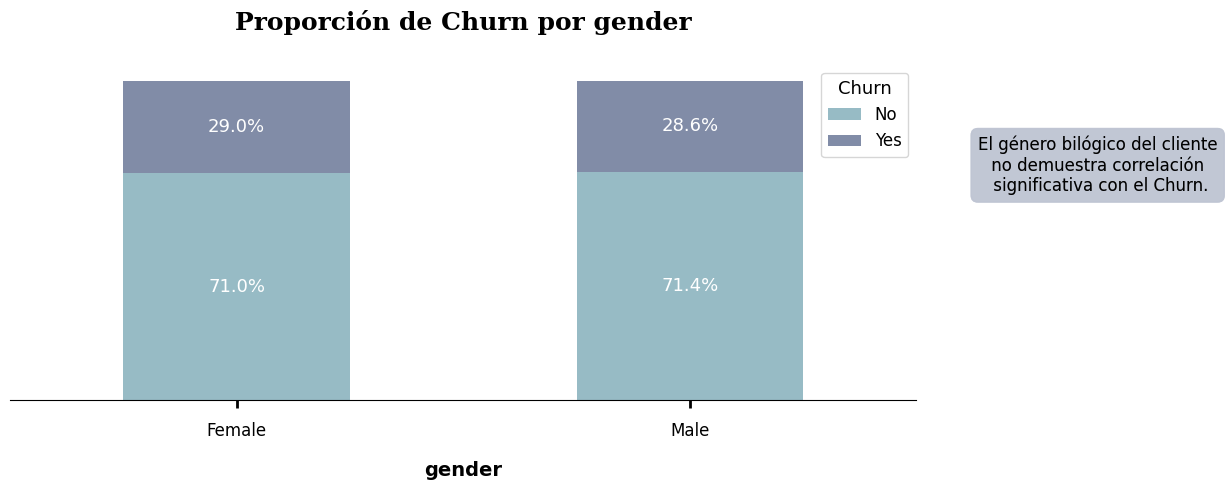

In [ ]:
churn_gender

####**b) Tipo de Contrato**
Los clientes con **contratos mes a mes** presentan una probabilidad de churn significativamente mayor (diferencia del **X%** respecto a contratos de dos años). Esto puede atribuirse a:

- **Falta de compromiso**: La flexibilidad de estos contratos facilita la cancelación.

- **Menor fidelización:** La ausencia de incentivos a largo plazo reduce la lealtad del cliente.

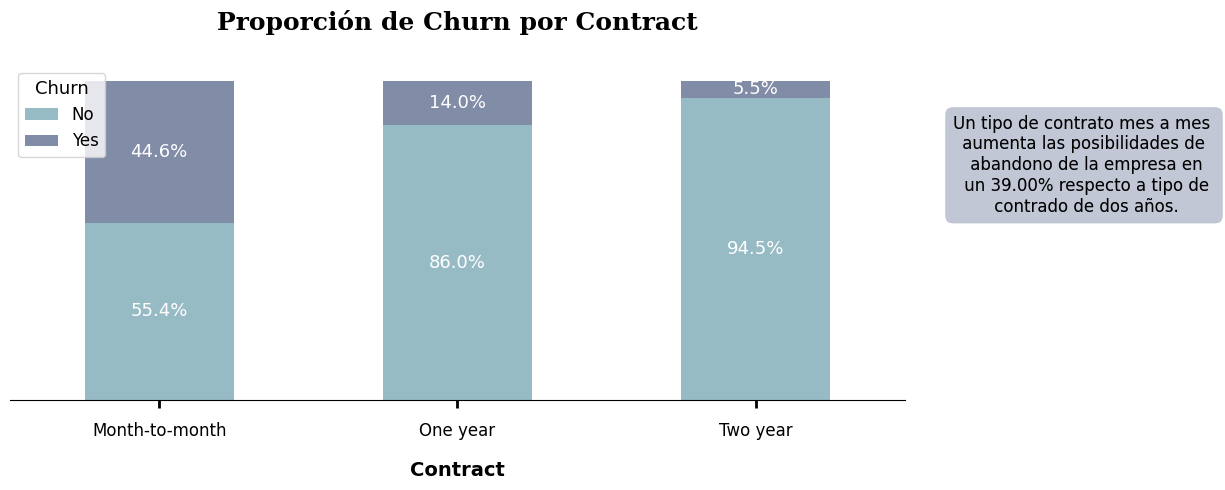

In [ ]:
churn_ContractType

####**c) Método de Pago**

El **cheque electrónico (E-Check)** registra la mayor tasa de abandono (diferencia del **X%** frente a pagos con tarjeta de crédito). Posibles causas:

- **Procesos manuales:** Mayor tiempo de verificación frente a métodos automatizados.

- **Riesgo de fallos:** Errores en el cobro pueden generar insatisfacción.

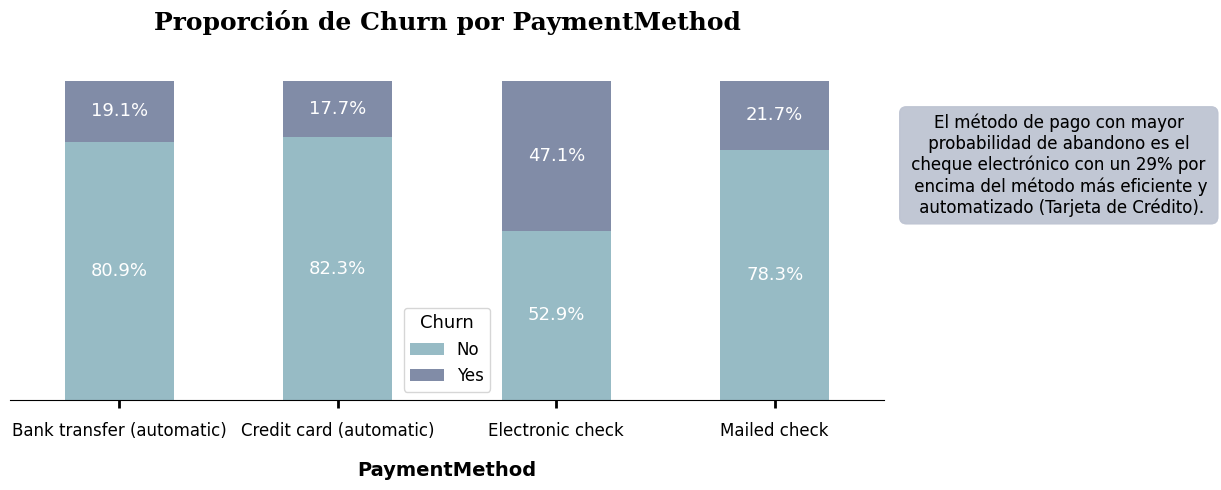

In [ ]:
churn_PaymentMethod

####**d) Facturación sin Papel (Paperless Billing)**

Los clientes inscritos en este programa tienen un X% más de probabilidad de abandonar. Aunque no hay una causa clara, se hipotetiza que:

- **Falta de recordatorio:** Los clientes podrían olvidar pagar al no recibir facturas físicas.

- **Sobresaturación de correos:** La factura electrónica se pierde entre otros mensajes.

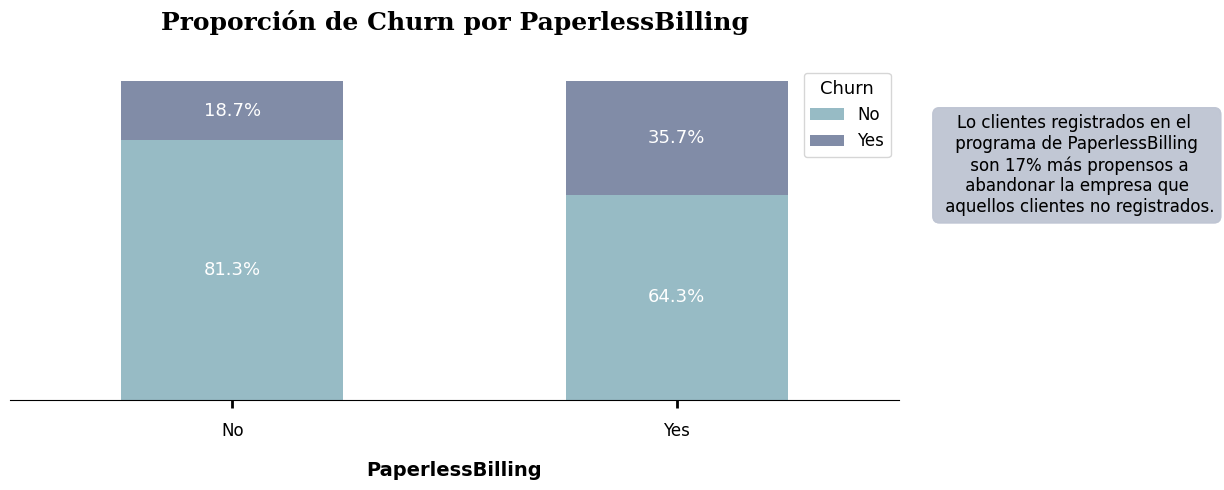

In [ ]:
churn_PaperlessBilling

####**e) Tipo de Servicio de Internet**

Contrario a lo esperado, los usuarios de **fibra óptica** abandonan más que los de **DS**L (diferencia del **X%**). Esto podría deberse a:

* **Expectativas no cumplidas:** Problemas técnicos o sobreventa de beneficios.

* **Costo percibido:** Mayor precio sin una ventaja clara para el cliente.

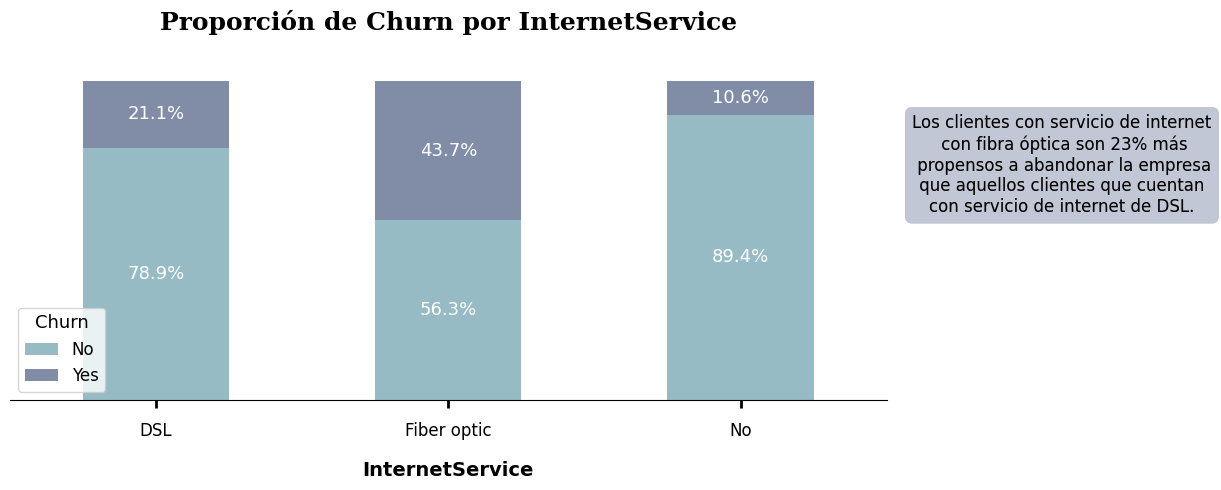

In [ ]:
churn_InternetService

####**f) Soporte Técnico**

Los clientes **sin soporte técnico** tienen un **X%** más de probabilidad de cancelar. Esto refuerza la importancia de:

* **Atención oportuna:** La falta de asistencia genera frustración acumulada.

* **Experiencia negativa:** Problemas no resueltos llevan a la deserción.

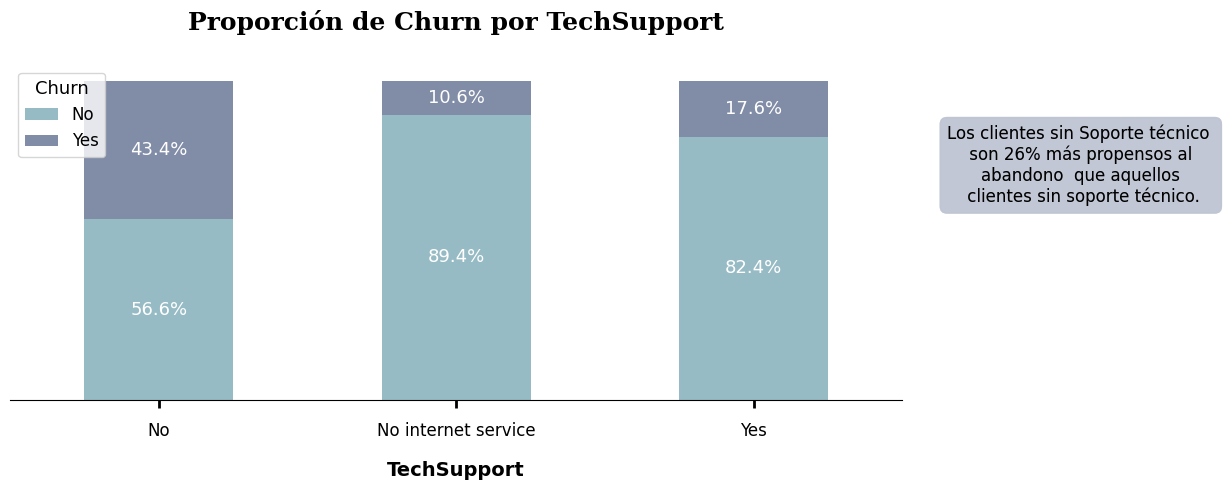

In [ ]:
churn_TechSupport

### **4. Distribución del Churn en Variables Numéricas**

####**a) Duración del Contrato (Tenure)**

Los clientes con contratos **≤ 12 meses** muestran un churn **X%** mayor que aquellos con contratos más largos. Esto coincide con la tendencia observada en contratos mes a mes, donde la falta de compromiso a largo plazo incrementa la rotación.

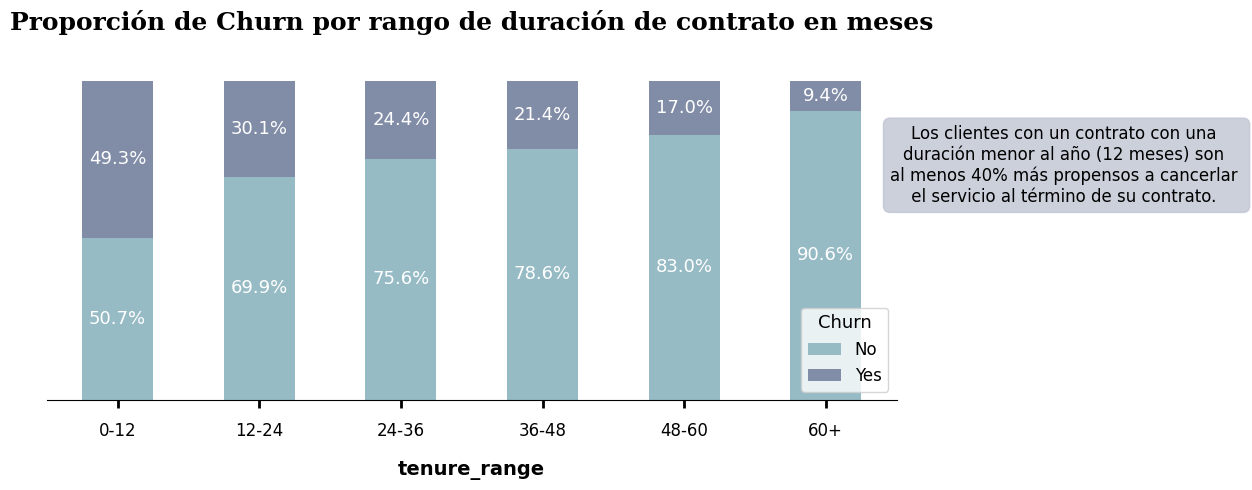

In [ ]:
churn_tenure

####**b) Cargos Diarios y Mensuales**
* **Cargos diarios (2.5–3)**: Mayor tasa de churn (diferencia del **X%** frente a rangos superiores).

* **Cargos mensuales (70–80)**: Similarmente, este rango presenta mayor abandono que cargos más altos (90–119).

**Hipótesis:** Los clientes en estos rangos podrían percibir un **desequilibrio entre costo y valor recibido**, mientras que aquellos con gastos más elevados podrían estar más satisfechos con el servicio.

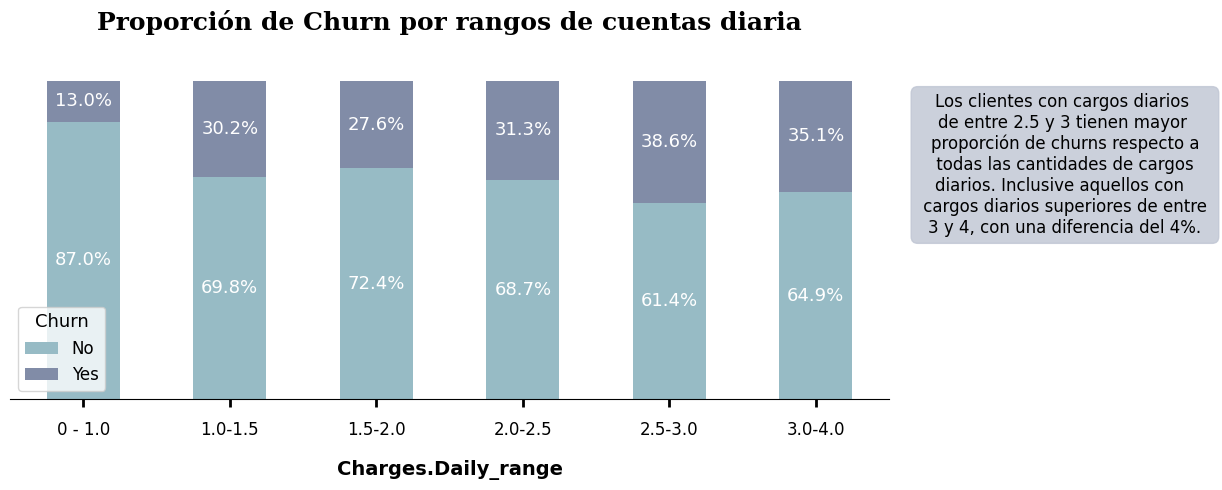

In [ ]:
churn_ChargesDaily

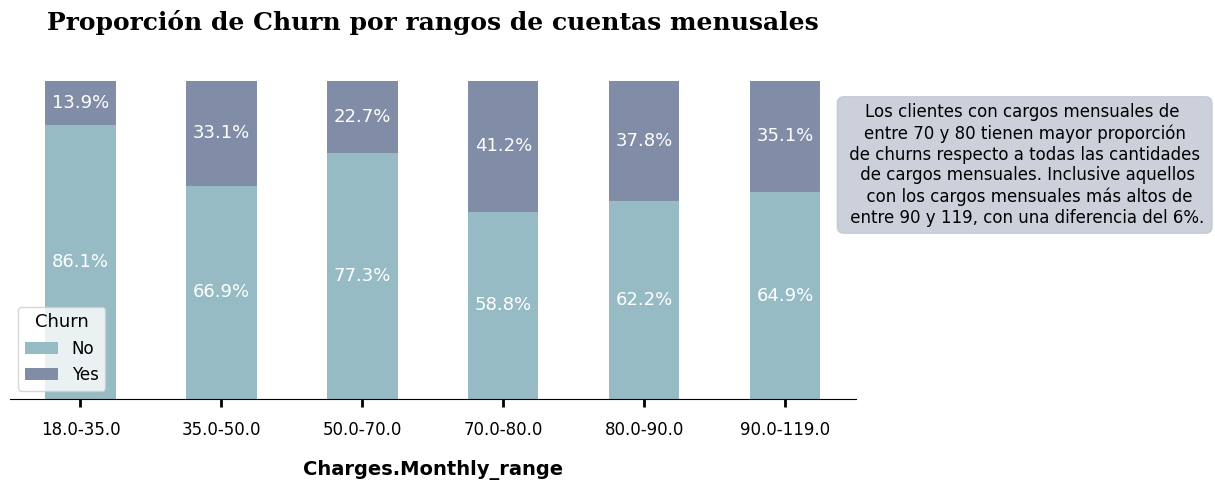

In [ ]:
churn_ChargesMonthly

####**c) Cargos Totales**
Los clientes con cargos totales bajos **(0–396)** tienen mayor churn que aquellos con gastos altos (**3,779–8,685)**. Esto sugiere que:

* **Clientes con bajo gasto:** Menor engagement con la marca.

* **Clientes con alto gasto:** Posiblemente reciben mejores beneficios o atención personalizada.

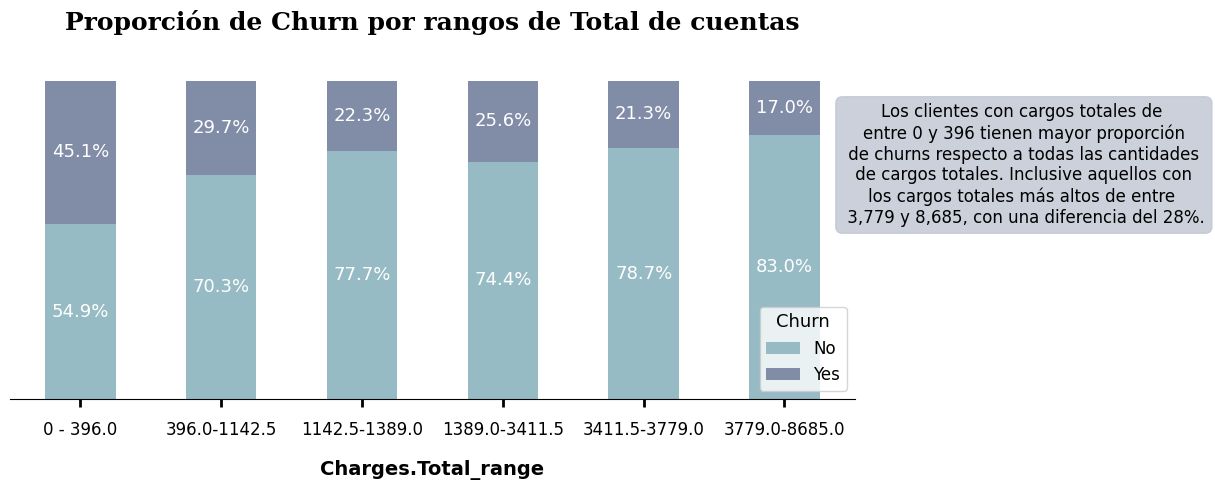

In [ ]:
churn_ChargesTotal

## **Conclusiones e Insights**


---
### **Conclusiones Principales**

* **Churn Rate Competitivo, pero con Oportunidades de Mejora**
    
    * TelecomX tiene un **churn rate del 28.8%**, inferior al promedio de la industria (31%), lo que indica una posición relativamente favorable. Sin embargo, este porcentaje sigue representando una pérdida significativa de ingresos y clientes.

  * **Áreas críticas**: Contratos cortos, métodos de pago manuales y falta de soporte técnico son los principales impulsores del abandono.

* **Factores Clave que Influyen en el Churn**

  * **Compromiso del cliente:** Los contratos a corto plazo (mes a mes o ≤12 meses) aumentan la probabilidad de churn frente a contratos largos.

  * **Experiencia operativa:** Métodos de pago no automatizados (cheques electrónicos) y la falta de soporte técnico generan fricciones que llevan a la cancelación.

  * **Paradojas en la percepción de valor:**

    * **Fibra óptica vs. DSL:** Aunque la fibra óptica es técnicamente superior, tiene un churn más alto, lo que sugiere problemas en la gestión de expectativas o calidad del servicio.

    * **Cargos medios vs. altos:** Los clientes con gastos intermedios (ej. cargos mensuales de 70–80) abandonan más que aquellos con cargos elevados, posiblemente por una discrepancia entre precio y valor percibido.

* **Variables No Determinantes**

  *  **Género:** No muestra correlación con el churn, lo que descarta sesgos o preferencias basadas en esta variable.

  * **Facturación electrónica (Paperless Billing):** Aunque asociada a mayor churn, no hay una causa clara, lo que requiere investigación cualitativa adicional.



---

### **Insights Estratégicos**

* **Retención Basada en Compromiso**

  * **Incentivar contratos largos:** Ofrecer descuentos, beneficios exclusivos o servicios adicionales para clientes que elijan planes anuales o bienales.

  * **Programas de fidelización:** Recompensar la antigüedad del cliente con upgrades gratuitos o atención prioritaria.

* **Optimización de Procesos**

  * **Automatización de pagos:** Promover activamente el pago con tarjeta de crédito o domiciliación bancaria, reduciendo la dependencia de cheques electrónicos.

  * **Mejora del soporte técnico:** Implementar chatbots 24/7, respuestas rápidas en redes sociales o seguimiento proactivo a clientes con incidencias recurrentes.

* **Enfoque en Experiencia del Cliente**

  * **Fibra óptica:** Investigar si hay problemas de velocidad, cortes frecuentes o sobreprecio mediante encuestas de satisfacción.

  * **Comunicación clara:** Evitar la sobreventa de beneficios y garantizar que las promesas del servicio se cumplan.

* **Segmentación para Acciones Personalizadas**

  * **Clientes con bajo gasto (0–396 total):** Diseñar campañas de engagement (ej. ofertas personalizadas) para evitar su deserción.

  * **Clientes con cargos intermedios (70–80 mensuales):** Evaluar si perciben insuficiente valor por el precio y ajustar paquetes o beneficios.


## **Recomendaciones**


---
* **Estudio cualitativo complementario:** Realizar entrevistas o focus groups con clientes que cancelaron (especialmente los de fibra óptica y facturación electrónica) para entender sus motivos.

* **Monitoreo continuo:** Implementar un dashboard de seguimiento del churn por categorías para detectar tendencias en tiempo real.

* **Pruebas piloto:** A/B testing con diferentes estrategias (ej. descuentos para contratos largos vs. mejora en soporte técnico) para medir su impacto en la retención.

**Impacto esperado:** Reducir el churn al menos un 5% en los próximos 12 meses, lo que se traduciría en mayores ingresos recurrentes y menor costo de adquisición de nuevos clientes.

